# Customer Segmentation with K-Nearest Neighbors(KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<Axes: ylabel='count'>

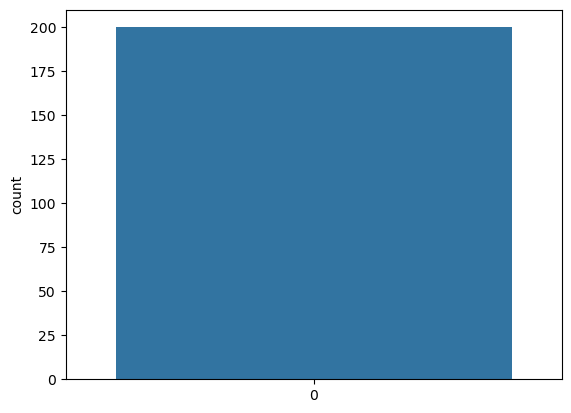

In [6]:
sns.countplot(data['Spending Score (1-100)'])

In [13]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
x=data.iloc[:,:-1]

In [8]:
x.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [10]:
y=data.iloc[:,-1:]
y.head()

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x=sc.fit_transform(x)

In [17]:
sc_x.shape

(200, 4)

In [18]:
sc_x[0]

array([-1.7234121 ,  1.12815215, -1.42456879, -1.73899919])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (160, 4)

Training data-Y- shape:	 (160, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (40, 4)

Testing data(Y-Input) shape:	 (40, 1)


In [23]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('***KNN Classifier Model********')
print('Training Phase\n')
knn_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***KNN Classifier Model********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]
Test is also done

****************************************************************************************************


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.025

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sravan Kumar\anaconda3\Lib\site-p

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

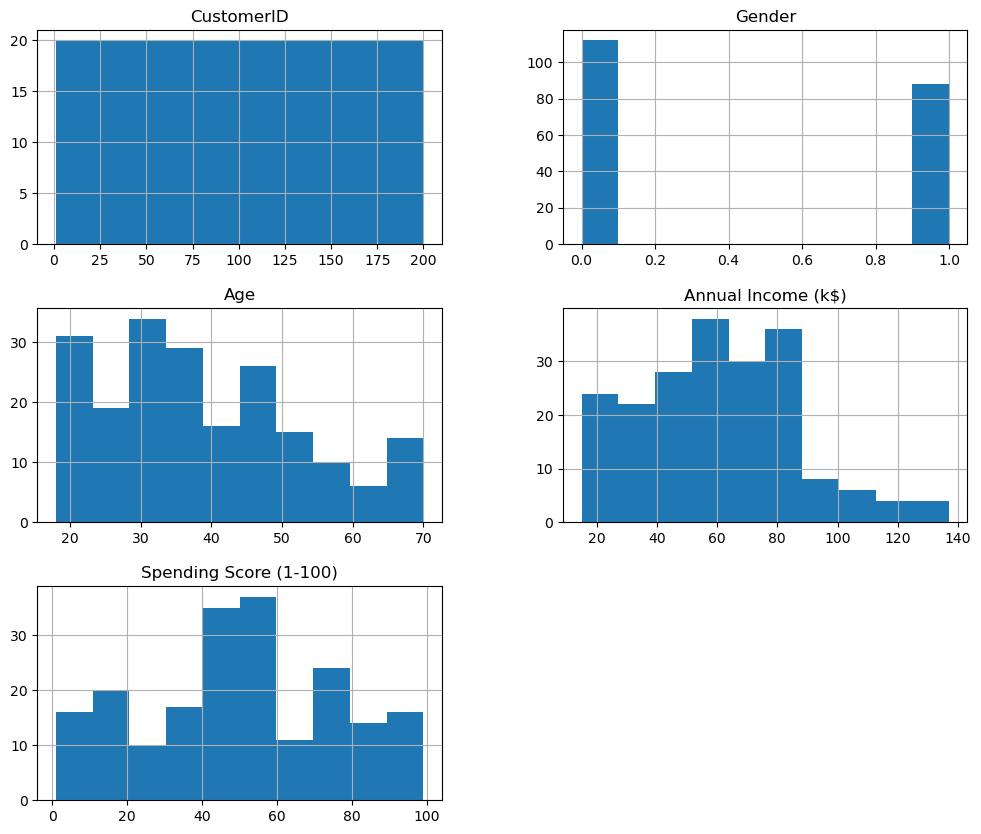

In [28]:
data.hist(figsize=(12,10))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7, 9]
results = {}

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtrain, ytrain)
    y_pred = knn_model.predict(xtest)
    print(f"Prdicted Class Labels for K-value {k}: {ypred}")
    print()
    accuracy = accuracy_score(ytest, y_pred)
    results[k] = accuracy

for k, accuracy in results.items():
    print(f"K={k}: Accuracy = {accuracy}")

Prdicted Class Labels for K-value 3: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

Prdicted Class Labels for K-value 5: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

Prdicted Class Labels for K-value 7: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

Prdicted Class Labels for K-value 9: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

K=3: Accuracy = 0.025
K=5: Accuracy = 0.025
K=7: Accuracy = 0.025
K=9: Accuracy = 0.025


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

# Medical Diagnosis with Naive Bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Normal,Normal,Positive


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Disease']=le.fit_transform(data['Disease'])
data['Fever']=le.fit_transform(data['Fever'])
data['Cough']=le.fit_transform(data['Cough'])
data['Fatigue']=le.fit_transform(data['Fatigue'])
data['Difficulty Breathing']=le.fit_transform(data['Difficulty Breathing'])
data['Blood Pressure']=le.fit_transform(data['Blood Pressure'])
data['Cholesterol Level']=le.fit_transform(data['Cholesterol Level'])
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,1,2,Positive
1,24,0,1,1,0,25,2,2,Negative
2,37,0,1,1,0,25,2,2,Negative
3,6,1,1,0,1,25,2,2,Positive
4,6,1,1,0,1,25,2,2,Positive


In [21]:
data.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [22]:
x=data.iloc[:,:-1]
x.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level
0,56,1,0,1,1,19,1,2
1,24,0,1,1,0,25,2,2
2,37,0,1,1,0,25,2,2
3,6,1,1,0,1,25,2,2
4,6,1,1,0,1,25,2,2


In [23]:
y=data.iloc[:,-1:]
y.head()

,Outcome Variable
0,Positive
1,Negative
2,Negative
3,Positive
4,Positive


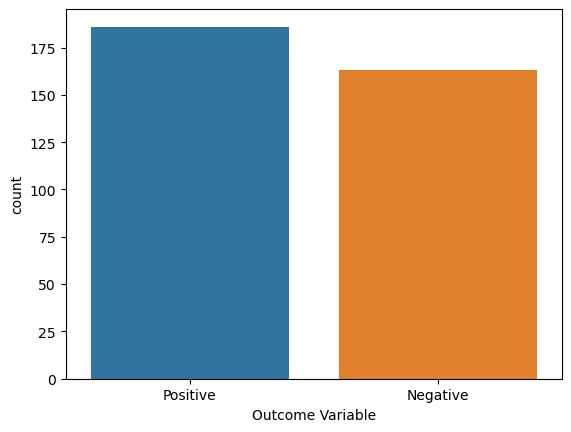

In [34]:
sns.countplot(data=data, x='Outcome Variable')
plt.show()

array([[<Axes: title={'center': 'Disease'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Cough'}>],
       [<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Difficulty Breathing'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Cholesterol Level'}>, <Axes: >]],
      dtype=object)

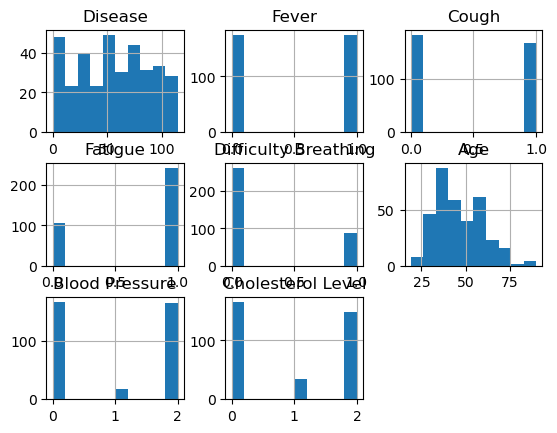

In [25]:
data.hist()

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Disease,349.0,55.326648,33.205852,0.0,27.0,56.0,81.0,115.0
Fever,349.0,0.501433,0.500716,0.0,0.0,1.0,1.0,1.0
Cough,349.0,0.478510,0.500255,0.0,0.0,0.0,1.0,1.0
Fatigue,349.0,0.693410,0.461740,0.0,0.0,1.0,1.0,1.0
Difficulty Breathing,349.0,0.252149,0.434870,0.0,0.0,0.0,1.0,1.0
Age,349.0,46.323782,13.085090,19.0,35.0,45.0,55.0,90.0
Blood Pressure,349.0,0.991404,0.975231,0.0,0.0,1.0,2.0,2.0
Cholesterol Level,349.0,0.951289,0.950154,0.0,0.0,1.0,2.0,2.0


In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [37]:
xtrain.shape

(279, 8)

In [38]:
ytrain.shape

(279, 1)

In [39]:
ytest.shape

(70, 1)

In [40]:
xtest.shape

(70, 8)

In [41]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=gauss_nb.predict(xtest)
print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('^'*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('^'*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('^'*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('^'*60)     

Training completed....

Testing is done
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Accuracy Score:	
 0.5571428571428572

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Confusion Matrix:
 [[17 13]
 [18 22]]

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.49      0.57      0.52        30
    Positive       0.63      0.55      0.59        40

    accuracy                           0.56        70
   macro avg       0.56      0.56      0.55        70
weighted avg       0.57      0.56      0.56        70

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


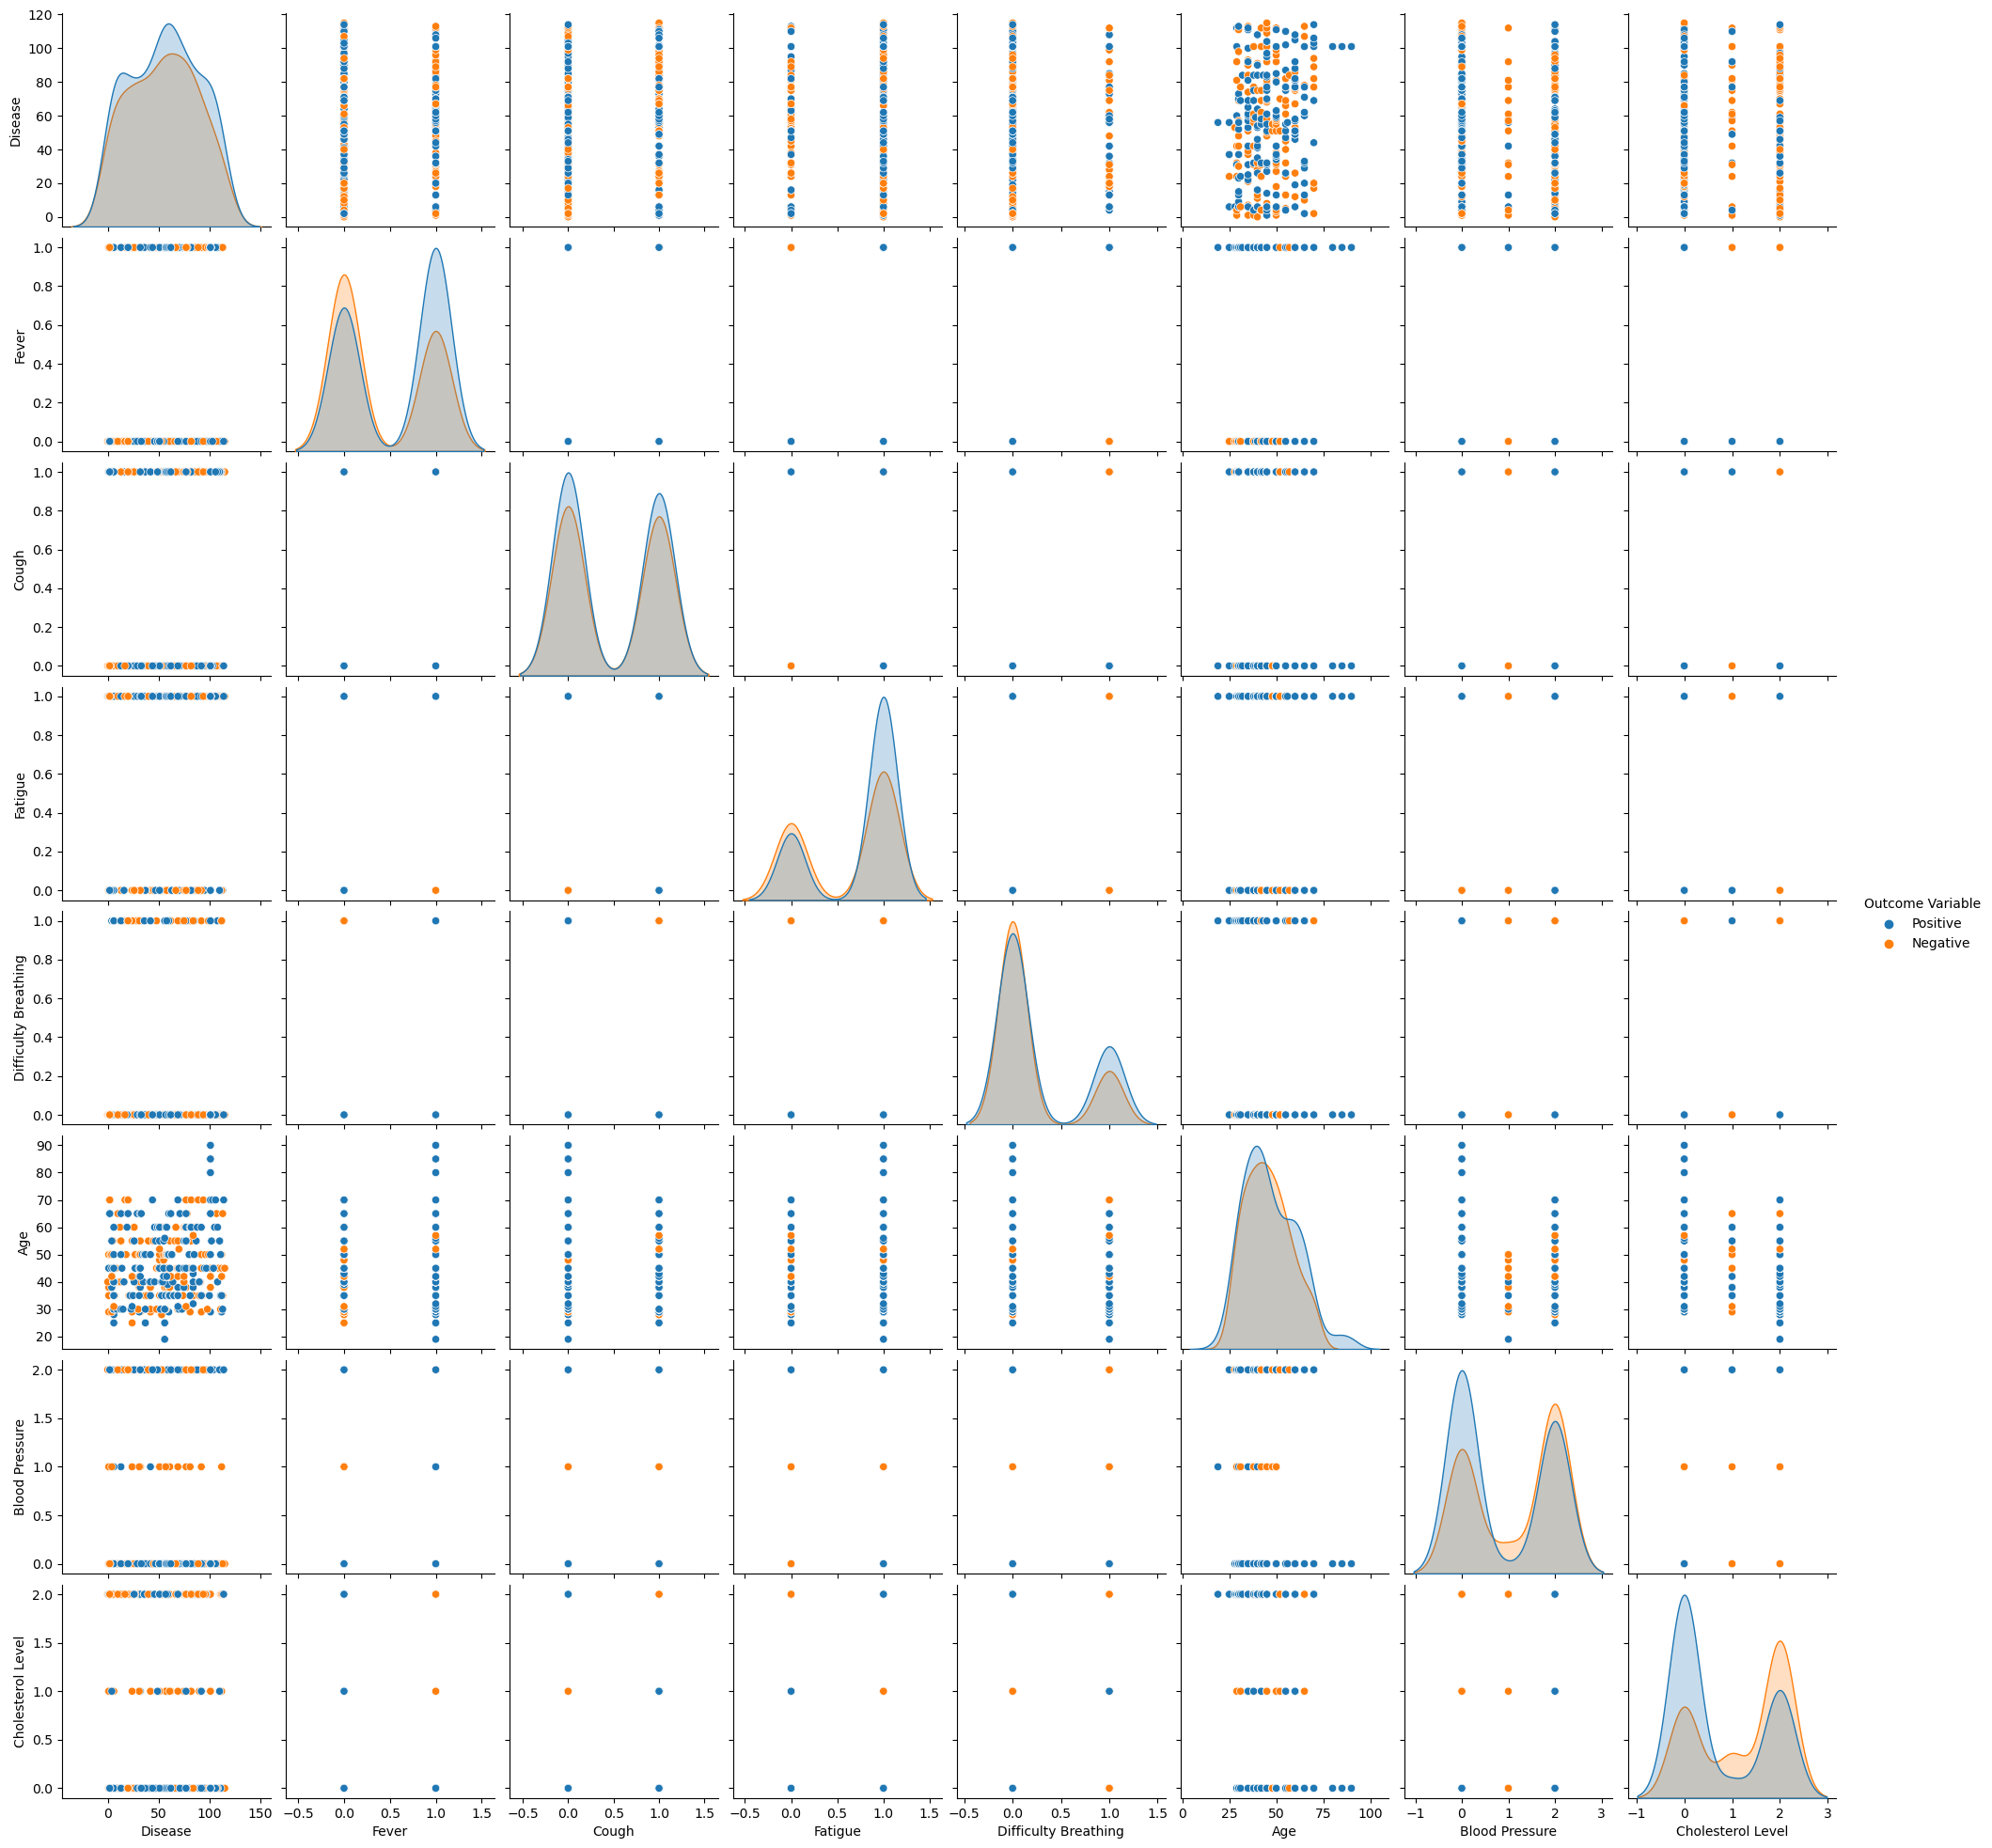

In [42]:
sns.pairplot(data,hue="Outcome Variable")